Author: Ashkan Nikfarjam

for analysis on housing prices in Germany I scraped some data from https://housinganywhere.com/Germany


<!DOCTYPE html>
<html lang="en">
 <head>
  <script data-installer="snippet" data-unless="1.1">
   !function(o,p,t,i,m,a,l){function s(e){o.documentElement.style.opacity=e}function d(e){i.parentNode.insertBefore(e,i)}s((window.TxtOptions||{}).asyncMode?"":0),setTimeout(function(){s("")},3e3),i=(o.head||o.documentElement).firstChild,l="https://"+t+".unless.com/js/v5/latest/txt.min.js?id="+t+"&domain="+window.location.hostname,(m=o.createElement("link")).href=l,m.rel="preconnect preload",m.as=p,d(m),(a=o.createElement(p)).src=l,d(a),a.onerror=function(){s("")}}(document,"script","e65f5aca-72b9-4ba6-9974-049f63104ecc");
  </script>
  <meta charset="utf-8"/>
  <title data-rh="true">
   Living in Berlin :  an expat city guide | HousingAnywhere
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0" name="viewport"/>
  <meta content="DPR, Width, Viewport-Width" http-equiv="Accept-CH"/>
  <meta content="#FFF
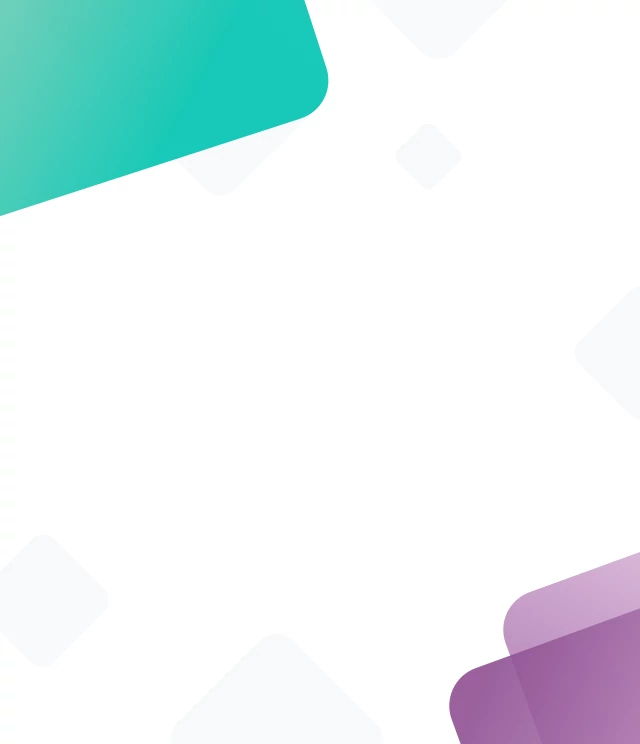
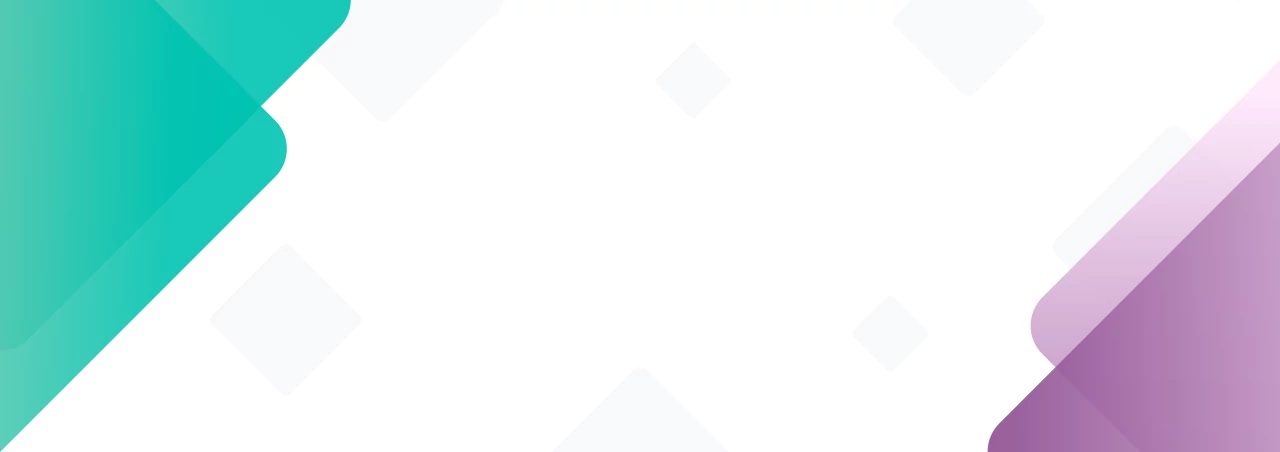

In [13]:
import requests
from bs4 import BeautifulSoup
url = "https://housinganywhere.com/Berlin--Germany"
response = requests.get(url)

if response.status_code == 200:
    berlin_soup = BeautifulSoup(response.content, 'html.parser')
    print(berlin_soup.prettify())
else:
    print("Cant reach https://housinganywhere.com/Berlin--Germany")
with open("rentalpage.txt",'w') as file:
    file.write(berlin_soup.prettify())

In [14]:
#extract jscript to see if we can extract data from here
berling_jscripts = berlin_soup.find_all('script')
#writer this data to a file
with open("berlin_scripts.json", 'w') as file:
    # Write each script tag's text content to the file
    for tags in berling_jscripts:
        file.write(tags.get_text())

we got this field to extract using regular expressions
"maxPrice":819"
"firstDate":"2024-04-02"
"floorPlanCount":2
"freePlaces":1
"has3DTour":false
"indexedAt":"2024-03-16 09:14:18"
"description":"Rooms or be..."
"estimatedBills":0
"estimatedBillsEUR":0
"facility_ac":"no"
"facility_allergy_friendly":"no"
"facility_animal_allowed":"no"
"facility_balcony_terrace":"no"
"facility_basement":"shared"
"facility_bathroom":"shared_w_both"
"facility_bed":"yes"
"facility_bedroom_count":"1"
"facility_bedroom_furnished":"yes"
"facility_bedroom_size":"20"
"facility_cleaning_common":"yes"
"facility_cleaning_private":"yes","facility_closet":"yes","facility_desk":"yes","facility_dishwasher":"no","facility_dryer":"no","facility_flooring":"wood","facility_garden":"shared","facility_heating":"central","facility_housemates_gender":"shared_w_both","facility_internet":"yes","facility_kitchen":"shared","facility_kitchenware":"shared","facility_living_room":"no","facility_lock":"yes","facility_lroom_furniture":"no","facility_parking":"shared","facility_play_music":"discussable","facility_registration_possible":"yes","facility_smoking_allowed":"outside_only","facility_tenant_status":"any","facility_toilet":"shared","facility_total_size":"70","facility_tv":"no","facility_washing_machine":"yes","facility_wheelchair_accessible":"no","facility_wifi":"yes","firstDate":"2024-03-16","floorPlanCount":1,

In [15]:
#read data from our created json
with open("berlin_scripts.json", 'r') as file:
    burlinRentData = file.read()
#import regex and csv library to be able extract and creat a nice data set
import re
import csv
discription_pattern = r'"firstDate":"(.*?)"'
price_pattern = r'"maxPrice":.{3}'
discription = re.findall(discription_pattern, burlinRentData)
prices = re.findall(price_pattern, burlinRentData)
print(len(prices))
print(len(discription))

20
20


Now that i know how does each page looks like and structure of each individual city site now i can use this to our advantage to create our big dataset and scrape data directly from"https://housinganywhere.com/Germany"

In [16]:
# trying to use crowling and see if i can get data for multiple cities at once
url_main = "https://housinganywhere.com/Germany"
response2 = requests.get(url_main)

if response2.status_code == 200:
    soup = BeautifulSoup(response2.content, 'html.parser')
    with open("main_url.html", 'w') as file:
        file.write(soup.prettify())
else:
    print("Cant reach", url_main)


In [17]:
base_url = "https://housinganywhere.com"
pages=[]
for link in soup.find_all('a', class_='css-1dfuh6o-link'):
    url = base_url+link.get('href')
    pages.append(url)

print(pages)


['https://housinganywhere.com/', 'https://housinganywhere.com/Berlin--Germany', 'https://housinganywhere.com/Munich--Germany', 'https://housinganywhere.com/Hamburg--Germany', 'https://housinganywhere.com/Frankfurt-am-Main--Germany', 'https://housinganywhere.com/Stuttgart--Germany', 'https://housinganywhere.com/Cologne--Germany', 'https://housinganywhere.com/Dusseldorf--Germany', 'https://housinganywhere.comhttps://housinganywhere.com/Germany/moving-to-germany-checklist', 'https://housinganywhere.comhttps://housinganywhere.com/Germany/best-cities-in-germany-to-live', 'https://housinganywhere.comhttps://housinganywhere.com/Germany/renting-in-germany', 'https://housinganywhere.comhttps://housinganywhere.com/Germany/german-scholarships-for-international-students', 'https://housinganywhere.comhttps://housinganywhere.com/Germany/language-barrier-in-germany', 'https://housinganywhere.com/s/Berlin--Germany', 'https://housinganywhere.com/s/Dusseldorf--Germany', 'https://housinganywhere.com/s/Fr

In [18]:
def scrape_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    script = soup.find_all('script')

    script_text = "".join([str(s) for s in script])  # Join all the script tags into a single string

    #description_pattern = r'"description":"(.*?)\.'
    date_pattern = r'"firstDate":"(.*?)"'
    price_pattern = r'"maxPrice":(\d+\.?\d*)'

    #description = re.findall(description_pattern, script_text)
    dates = re.findall(date_pattern, script_text)
    prices = re.findall(price_pattern, script_text)

    return [dates, prices]

In [19]:
scrape_data('https://housinganywhere.com/Stuttgart--Germany')

[['2024-09-06',
  '2024-03-25',
  '2024-06-02',
  '2024-04-01',
  '2024-09-06',
  '2024-06-02',
  '2024-08-01',
  '2024-03-18',
  '2024-05-01',
  '2024-03-16',
  '2024-07-06',
  '2024-08-31',
  '2024-03-25',
  '2024-04-01',
  '2024-08-21',
  '2024-04-04',
  '2024-03-18',
  '2024-03-17',
  '2024-08-01',
  '2024-09-01'],
 ['880',
  '465',
  '1090',
  '600',
  '880',
  '1090',
  '940',
  '1600',
  '1490',
  '1200',
  '1280',
  '850',
  '465',
  '600',
  '575',
  '725',
  '690',
  '690',
  '640',
  '640']]

In [20]:
pages[2]

'https://housinganywhere.com/Munich--Germany'

In [21]:
data = []
for page in pages[1:7]:
    scraped_data = scrape_data(str(page))
    data.append([page,scraped_data[0], scraped_data[1]])
data

[['https://housinganywhere.com/Berlin--Germany',
  ['2024-04-02',
   '2024-03-18',
   '2024-06-01',
   '2024-05-01',
   '2024-06-01',
   '2024-05-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-02',
   '2024-03-18',
   '2024-04-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-01',
   '2024-03-18',
   '2024-03-18',
   '2024-03-18',
   '2024-03-18',
   '2024-03-18',
   '2024-04-16'],
  ['777',
   '788',
   '819',
   '963',
   '819',
   '963',
   '997',
   '997',
   '777',
   '788',
   '1156',
   '1100',
   '615',
   '615',
   '625',
   '625',
   '430',
   '450',
   '450',
   '450']],
 ['https://housinganywhere.com/Munich--Germany',
  ['2024-03-18',
   '2024-03-18',
   '2024-03-25',
   '2024-11-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-01',
   '2024-04-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-08',
   '2024-05-01',
   '2024-03-25',
   '2024-03-18',
   '2024-03-18',
   '2024-03-25',
   '2024-03-18',
   '2024-03-18',
   '2024-03-15',
   '2024-03-18'],
  ['1195',
   '1

In [22]:
import pandas as pd
#type(data[0][0])
city_data = {}
for city in data:
    city[0] = city[0].split('/')[-1]
    #city_name = {'Date':city[1], 'Remtal Prices': city[2]}
#city_data
data

[['Berlin--Germany',
  ['2024-04-02',
   '2024-03-18',
   '2024-06-01',
   '2024-05-01',
   '2024-06-01',
   '2024-05-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-02',
   '2024-03-18',
   '2024-04-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-01',
   '2024-03-18',
   '2024-03-18',
   '2024-03-18',
   '2024-03-18',
   '2024-03-18',
   '2024-04-16'],
  ['777',
   '788',
   '819',
   '963',
   '819',
   '963',
   '997',
   '997',
   '777',
   '788',
   '1156',
   '1100',
   '615',
   '615',
   '625',
   '625',
   '430',
   '450',
   '450',
   '450']],
 ['Munich--Germany',
  ['2024-03-18',
   '2024-03-18',
   '2024-03-25',
   '2024-11-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-01',
   '2024-04-01',
   '2024-03-18',
   '2024-03-18',
   '2024-04-08',
   '2024-05-01',
   '2024-03-25',
   '2024-03-18',
   '2024-03-18',
   '2024-03-25',
   '2024-03-18',
   '2024-03-18',
   '2024-03-15',
   '2024-03-18'],
  ['1195',
   '1600',
   '659',
   '1090',
   '1195',
   '1600',
   '185

In [23]:
dfs = []
for index, city in enumerate(data):   
    df = pd.DataFrame(data[index][1:], index=['dates', 'prices']).T
    df['city'] = data[index][0]
    dfs.append(df)

result_df = pd.concat(dfs,ignore_index=True)
result_df

,dates,prices,city
0,2024-04-02,777,Berlin--Germany
1,2024-03-18,788,Berlin--Germany
2,2024-06-01,819,Berlin--Germany
3,2024-05-01,963,Berlin--Germany
4,2024-06-01,819,Berlin--Germany
...,...,...,...
103,2024-03-30,1190,Cologne--Germany
104,2024-06-08,840,Cologne--Germany
105,2024-04-02,769,Cologne--Germany
106,2024-03-17,899,Cologne--Germany


dates     object
prices     int64
city      object
dtype: object


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Berlin--Germany'),
  Text(1, 0, 'Stuttgart--Germany'),
  Text(2, 0, 'Frankfurt-am-Main--Germany'),
  Text(3, 0, 'Hamburg--Germany'),
  Text(4, 0, 'Munich--Germany'),
  Text(5, 0, 'Cologne--Germany')])

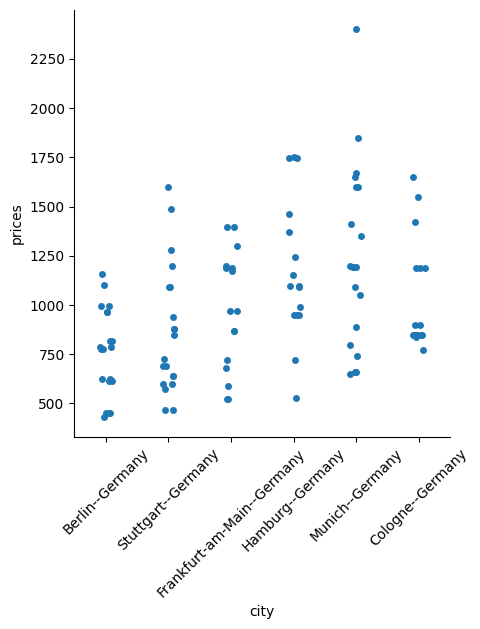

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
result_df['prices'] = result_df.prices.astype(int)
print(result_df.dtypes)
result_df.sort_values(by='prices', inplace=True)
sns.catplot(result_df, x='city', y='prices')
plt.xticks(rotation=45)